### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [ ]:
iris = pd.read_csv('iris.csv',index_col=0)
iris.head()

,sepal_lenght,sepal_width,petal_lenght,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# iris.rename(columns={"class":"types"},inplace=True)

### Plotting the data

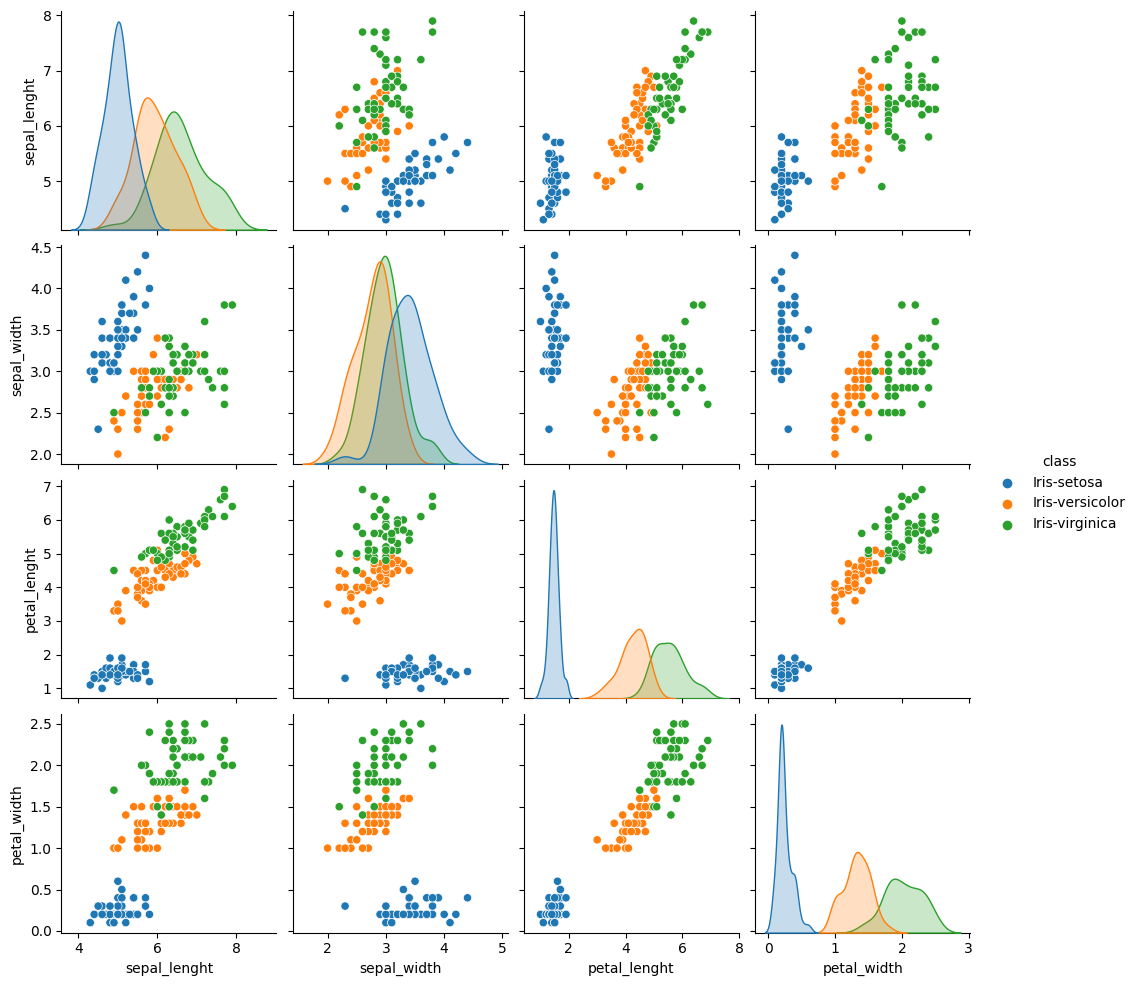

In [ ]:
sns.pairplot(iris, hue="class")

### Split the Dataset

In [ ]:
X = iris.drop('class',axis=1) #freatures
y = iris['class'] #lables

### Algorithm Implementation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

## Try 1

In [ ]:
# Initializing the model
# using arbitary value of k

model =KNeighborsClassifier(n_neighbors=10, metric = 'manhattan')

# training a knn model
model.fit(X,y)


KNeighborsClassifier(metric='manhattan', n_neighbors=10)

In [ ]:
# predicting a new sample value
sample = np.array([4.5,3.2,1.6,0.5])
model.predict([sample])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)

In [ ]:
# Checking our model's score
model.score(X,y)

0.9533333333333334

In [ ]:
from sklearn.model_selection import train_test_split
SEED = 42

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=SEED)

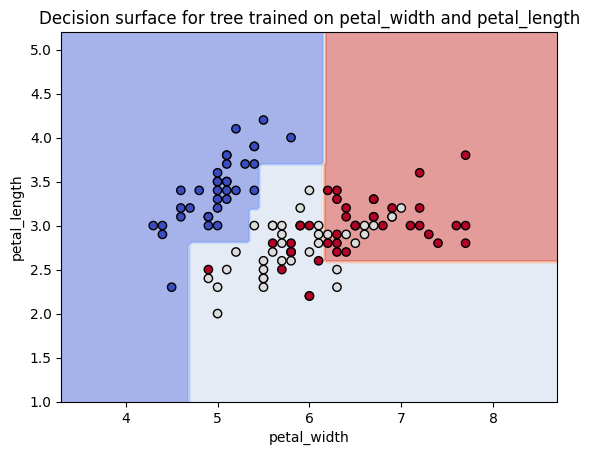

In [ ]:

# ADVERTISEMENT
# Tree-based models have become a popular choice for Machine Learning, not only due to their results, and the need for fewer transformations when working with data (due to robustness to input and scale invariance), but also because there is a way to take a peek inside of them to see what is going on with the data.

# We'll assume you have just trained a tree-based classifier using a Decision Tree model, and you want to take a look at how the tree is handling the data. You want to see what decisions were made when classifying a point as belonging to a class!


# Advice: If you want to get more familiar with tree-based models, you can read our in-depth "Guide to Decision Trees in Python with Scikit-Learn!".

# This means you want to look at the decision boundaries of the tree. Fortunately, Scikit-Learn already has a DecisionBoundaryDisplay in the sklearn.inspection module.

# First, we'll load a toy wine dataset and divide it into train and test sets:

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

SEED = 42

# data = load_wine()
# X = data.data
# y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=SEED)
# After splitting the data, we can choose two data columns to plot the decision boundary, fit the tree classifier on them, and generate the plot:

# Importing necessary libraries
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier

# Choosing the first 2 columns for the plot
X_train_cols = X_train.iloc[:, :2]

# Creating and fitting the tree classifier
classifier = DecisionTreeClassifier(max_depth=4,
                                    random_state=SEED).fit(X_train_cols, y_train)

# Plotting the tree boundaries
disp = DecisionBoundaryDisplay.from_estimator(classifier,
                                              X_train_cols,
                                              response_method="predict",
                                              xlabel='petal_width', ylabel='petal_length',
                                              alpha=0.5,
                                              cmap=plt.cm.coolwarm)

# Plotting the data points
disp.ax_.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1],
                 c=y_train.astype("category").cat.codes, edgecolor="k",
                 cmap=plt.cm.coolwarm)

plt.title(f"Decision surface for tree trained on petal_width and petal_length")
plt.show()

We can do better
## Try 2

We will writing a for loop were K value will range from 1 to 40. For each value of K we will store the corresponding accuracy in scores list.


In [ ]:
# this loop will tell us which k value is giving us bst accuracy.
scores = []
for k in range(1,40):
  knn = KNeighborsClassifier(k).fit(X,y)
  scores.append(knn.score(X,y))

print(scores,end=" ")

[1.0, 0.98, 0.96, 0.96, 0.9666666666666667, 0.9733333333333334, 0.9733333333333334, 0.98, 0.98, 0.98, 0.9733333333333334, 0.98, 0.98, 0.98, 0.9866666666666667, 0.9866666666666667, 0.98, 0.9733333333333334, 0.98, 0.98, 0.98, 0.98, 0.98, 0.9733333333333334, 0.98, 0.9733333333333334, 0.9733333333333334, 0.9666666666666667, 0.9733333333333334, 0.9533333333333334, 0.96, 0.9533333333333334, 0.96, 0.96, 0.96, 0.9533333333333334, 0.96, 0.9466666666666667, 0.9533333333333334] 

The scores printed above are not very readable. Lets use our plotting skills and make a line plot i.e. plotting accuracy against corresponding value of K.

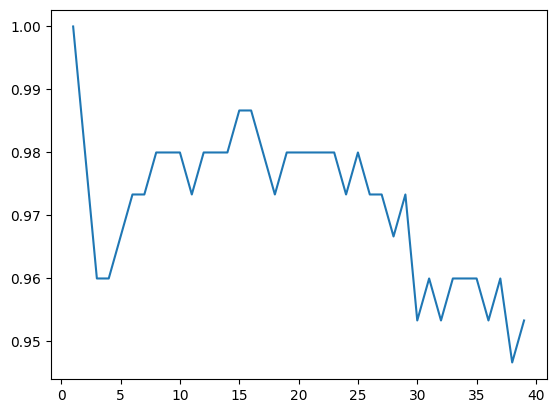

In [ ]:
plt.plot(np.arange(1,40),scores)

In the image above, x-axis represents value of K
, and y-axis represents Model Accuracy.

Ignore K=1, its a bluff. We are using the same dataset for training and testing. Every data points is closest to itself, hence you see 100% accuracy.

Here, for our iris dataset, you can see K=15 & K=16 gives the maximum score. Hence, we should use them for this dataset. Let’s put the values of K back into the model.



In [ ]:
final_model = KNeighborsClassifier(n_neighbors = 15, metric='manhattan')
final_model.fit(X,y)

KNeighborsClassifier(metric='manhattan', n_neighbors=15)

In [ ]:
sample = np.array([4.5,3.2,1.6,0.5])
final_model.predict([sample])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)

In [ ]:
final_model.score(X,y)

0.9733333333333334

## KNN from the Scratch

In [ ]:
iris.head(5)

,sepal_lenght,sepal_width,petal_lenght,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Initialize the value of K
K = 15

In [ ]:
df = iris
df

,sepal_lenght,sepal_width,petal_lenght,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
sample_point = df.sample(1)

sample_features = sample_point.iloc[:,:-1].values
sample_label = sample_point.iloc[:,-1].values
print(sample_features , sample_label)

[[5.8 2.7 4.1 1. ]] ['Iris-versicolor']


In [ ]:
from statistics import mode

In [ ]:
def knn(X,y,n_neighbors,metric='euclidean'):
  if metric == 'euclidean':
    p=2
  elif metric == 'manhattan':
    p = 1
  else:
    p = int(input('Enter value of p:- '))


  distance_formula = np.sum((X - sample_features)**p, axis = 1)**(1/p)
  sorted_distance = distance_formula.sort_values()
  return mode(y[sorted_distance[:n_neighbors].index])

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
n_neighbors = 5

knn(X,y, n_neighbors, metric = 'minkowski')

Enter value of p:- 2


'Iris-versicolor'

## Building a KNN class

In [ ]:
#from sklearn.preprocessing import StandardScaler
# Preprocess data
#X = StandardScaler().fit_transform(X)

X = iris.drop('class',axis=1)
y = iris['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
class KNN:
  def __init__(self, n_neighbors = 5, metric = 'euclidean'):
    self.n_neighbors = n_neighbors
    self.metric = metric

  def fit(self,X_train,y_train):
    self.X_train = X_train
    self.y_train = y_train

  def distance_calculation(self,point,data):
    if self.metric == "euclidean":
      p = 2
    elif self.metric == "manhattan":
      p == 1
    else:
      p == input("Enter the value of p: ")

    return np.sum((point-data)**p,axis=1)**(1/p)


  def predict(self,X_test):
   predictions = []
   for index, row in X_test.iterrows():
      test_point = [row['sepal_lenght'],row['sepal_width'],row['petal_lenght'],row['petal_width']]
      distance = self.distance_calculation(test_point,self.X_train)
      sorted_distance = distance.sort_values()
      most_frequent = mode(y[sorted_distance[:self.n_neighbors].index])
      predictions.append((most_frequent))
   return predictions

  def score(self,y_test,predictions):
    test_values = list(y_test[0:])
    correct_predictions = 0

    for predictions, y in zip(predictions,y_test):
      if predictions == y:
        correct_predictions += 1

    accuracy = correct_predictions/len(y_test)
    return accuracy

In [ ]:
model = KNN(n_neighbors = 3)
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [ ]:
model.score(y_test,predict)

0.9666666666666667

In [ ]:
class KNN:
  def __init__(self, n_neighbors = 5, metric = 'euclidean'):
    self.n_neighbors = n_neighbors
    self.metric = metric

  def fit(self,X_train,y_train):
    self.X_train = X_train
    self.y_train = y_train

  def distance_calculation(self,point,data):
    if self.metric == "euclidean":
      p = 2
    elif self.metric == "manhattan":
      p == 1
    else:
      p == input("Enter the value of p: ")

    return np.sum((point-data)**p,axis=1)**(1/p)


  def predict(self,X_test):
   predictions = []
   for index, row in X_test.iterrows():
      test_point = [row['sepal_lenght'],row['sepal_width'],row['petal_lenght'],row['petal_width']]
      distance = self.distance_calculation(test_point,self.X_train)
      sorted_distance = distance.sort_values()
      most_frequent = mode(y[sorted_distance[:self.n_neighbors].index])
      predictions.append((most_frequent))
   return predictions

  def score(self,y_test,predictions):
    correct_predictions = np.sum(y_test == predictions)
    accuracy = correct_predictions/len(y_test)
    return accuracy

In [ ]:
model = KNN(n_neighbors = 3)
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [ ]:
model.score(np.array(y_test),np.array(predict))

0.9666666666666667